# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the Rapper network. 
This is the outline for today:

* Visualization and qualitative analysis of the Rapper Network
* Properties of the network structure, including how attributes and other properties shape the network

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into [Section 9.4](http://networksciencebook.com/chapter/9#modularity) in the exercises below. We will also talk a little bit about degree correlations - you can read about those in [Chapter 7](http://networksciencebook.com/chapter/7)\.


![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")


---
# Part A: Let's  visualise!

We will continue to work with the network from last week, see the lecture for [Week 4](https://nbviewer.jupyter.org/github/socialcomplexitylab/socialgraphs2021/blob/main/lectures/Week4.ipynb) for details. This is important! Actually, in order to continue with the lecture, you *need* to complete Week 4. 


*Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of rappers. Remember that rappers are linked if they have a corresponding link between their Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have around 730 nodes and 6000 edges.
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component
>2. As you build the graph, store the attributes of the nodes (their `coast`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each rapper's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

In [1]:
import pandas as pd
df_west = pd.read_csv("../files/WestCoastRappers.csv",index_col=0)
print(df_west)
df_east = pd.read_csv("../files/EastCoastRappers.csv",index_col=0)
print(df_east)

    WikipediaPageName
0           03 Greedo
1            24kGoldn
2            40 Glocc
3     A-Plus (rapper)
4           DJ A-Tron
..                ...
349           Young L
350          Yukmouth
351        Arif Zahir
352          Zealous1
353        Asaiah Ziv

[354 rows x 1 columns]
    WikipediaPageName
0             6ix9ine
1          9th Prince
2                22Gz
3            38 Spesh
4         The 45 King
..                ...
442  Young Music DYMG
443         Younglord
444       Nosson Zand
445         ZillaKami
446       Mike Zombie

[447 rows x 1 columns]


In [2]:
# add a column to each dataframe with the coast name
df_west['Coast'] = 'West'
df_east['Coast'] = 'East'
#concatenate the two dataframes
df = pd.concat([df_west, df_east], ignore_index=True)
print(df)

    WikipediaPageName Coast
0           03 Greedo  West
1            24kGoldn  West
2            40 Glocc  West
3     A-Plus (rapper)  West
4           DJ A-Tron  West
..                ...   ...
796  Young Music DYMG  East
797         Younglord  East
798       Nosson Zand  East
799         ZillaKami  East
800       Mike Zombie  East

[801 rows x 2 columns]


In [3]:
# initiate a graph with all the rappers
import networkx as nx

G = nx.DiGraph()

for i in df.index:
    G.add_node(df['WikipediaPageName'][i], coast=df['Coast'][i], content_lenght=0)

print(G.nodes(data=True))

[('03 Greedo', {'coast': 'West', 'content_lenght': 0}), ('24kGoldn', {'coast': 'West', 'content_lenght': 0}), ('40 Glocc', {'coast': 'West', 'content_lenght': 0}), ('A-Plus (rapper)', {'coast': 'West', 'content_lenght': 0}), ('DJ A-Tron', {'coast': 'West', 'content_lenght': 0}), ('Ab-Soul', {'coast': 'West', 'content_lenght': 0}), ('Abstract Rude', {'coast': 'West', 'content_lenght': 0}), ('Aceyalone', {'coast': 'West', 'content_lenght': 0}), ('Afroman', {'coast': 'West', 'content_lenght': 0}), ('Ahmad (rapper)', {'coast': 'West', 'content_lenght': 0}), ("Ak'Sent", {'coast': 'West', 'content_lenght': 0}), ('The Alchemist (musician)', {'coast': 'West', 'content_lenght': 0}), ('AMG (rapper)', {'coast': 'West', 'content_lenght': 0}), ('Aminé (rapper)', {'coast': 'West', 'content_lenght': 0}), ('Antwon', {'coast': 'West', 'content_lenght': 0}), ('Aztlan Underground', {'coast': 'West', 'content_lenght': 0}), ('B-Legit', {'coast': 'West', 'content_lenght': 0}), ('B-Real', {'coast': 'West', '

In [4]:
import requests
import re

baseurl = "https://en.wikipedia.org/w/api.php?"

pattern = r'\[{2}(.+?)\]{2}'
word_pattern = r'\b\w+\b'

for i, rapper in enumerate(df['WikipediaPageName']):
    print(i, rapper)

    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": rapper
    }
    wikitext = requests.get(baseurl, params=params)
    wikijson = wikitext.json()
    key = wikijson['query']['pages'].keys()
    text = wikijson['query']['pages'][str(list(key)[0])]['revisions'][0]['*']
    
    match = re.findall(pattern, text)

    # count words in text with regex
    word_count = len(re.findall(word_pattern, text))

    G.nodes[rapper]['content_lenght'] = word_count
    for string in match:
        wikilink = string.split('|')[0]
        if (wikilink in df['WikipediaPageName'].values):
            # add directed edge from rapper to wikilink
            G.add_edge(rapper, wikilink)
    

0 03 Greedo
1 24kGoldn
2 40 Glocc
3 A-Plus (rapper)
4 DJ A-Tron
5 Ab-Soul
6 Abstract Rude
7 Aceyalone
8 Afroman
9 Ahmad (rapper)
10 Ak'Sent
11 The Alchemist (musician)
12 AMG (rapper)
13 Aminé (rapper)
14 Antwon
15 Aztlan Underground
16 B-Legit
17 B-Real
18 B.G. Knocc Out
19 Show Banga
20 Ant Banks
21 Sho Baraka
22 Bavgate
23 Becky G
24 Beeda Weeda
25 Beefy (rapper)
26 Berner (rapper)
27 Big B (rapper)
28 Big Dave (rapper)
29 Big Ed (rapper)
30 Big Fase 100
31 Bizzle
32 Aloe Blacc
33 Black Pegasus
34 Guerilla Black
35 Nissim Black
36 Toni Blackman
37 Blueface
38 Blxst
39 Bones (rapper)
40 Braille (musician)
41 Buddy (rapper)
42 Busdriver
43 Scott Caan
44 Sway Calloway
45 Nick Cannon
46 Captain Save 'Em
47 Clyde Carson
48 Celestaphone
49 DJ Cheapshot
50 Tha Chill
51 Shawn Chrystopher
52 Chanel West Coast
53 Conceit (rapper)
54 Coolio
55 Cozz
56 Crooked I
57 Omega Crosby
58 Cut Chemist
59 D-Loc
60 The D.O.C.
61 Daddy X
62 DJ Dahi
63 Dazzie Dee
64 DB Tha General
65 Del the Funky Homosapie

In [5]:
print(G.nodes(data=True))
print(len(G.nodes()))
print(len(G.edges()))


[('03 Greedo', {'coast': 'West', 'content_lenght': 2061}), ('24kGoldn', {'coast': 'West', 'content_lenght': 5574}), ('40 Glocc', {'coast': 'West', 'content_lenght': 2811}), ('A-Plus (rapper)', {'coast': 'West', 'content_lenght': 686}), ('DJ A-Tron', {'coast': 'West', 'content_lenght': 774}), ('Ab-Soul', {'coast': 'West', 'content_lenght': 6736}), ('Abstract Rude', {'coast': 'West', 'content_lenght': 1192}), ('Aceyalone', {'coast': 'West', 'content_lenght': 1796}), ('Afroman', {'coast': 'West', 'content_lenght': 2683}), ('Ahmad (rapper)', {'coast': 'West', 'content_lenght': 983}), ("Ak'Sent", {'coast': 'West', 'content_lenght': 1385}), ('The Alchemist (musician)', {'coast': 'West', 'content_lenght': 6060}), ('AMG (rapper)', {'coast': 'West', 'content_lenght': 897}), ('Aminé (rapper)', {'coast': 'West', 'content_lenght': 3973}), ('Antwon', {'coast': 'West', 'content_lenght': 2110}), ('Aztlan Underground', {'coast': 'West', 'content_lenght': 1160}), ('B-Legit', {'coast': 'West', 'content_

In [6]:
import numpy as np
# extract largest connected component
G_connected = list(G.subgraph(c) for c in nx.weakly_connected_components(G))
G_giant = G_connected[0]
for subgraph in G_connected:
    if len(subgraph) > len(G_giant):
        G_giant = subgraph

print(len(G_giant.nodes()))
print(len(G_giant.edges()))

728
5809


In [42]:
nx.write_gexf(G_giant, "rappers_giant_component.gexf")


*Exercise 2:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises
>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers).
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers assign `color_b`, in other cases assign `color_c` (i.e. when rapper from different coasts are connected). (Here, you get to decide on the colors.)

In [7]:
un_di_G = G_giant.to_undirected()
node_sizes = [un_di_G.degree(node)+1 for node in un_di_G]
colors = ['red' if un_di_G.nodes[node]['coast']=='West' else 'blue' for node in un_di_G]

edge_colors = []
for edge in un_di_G.edges():
    if un_di_G.nodes[edge[0]]['coast']=='West' and un_di_G.nodes[edge[1]]['coast']=='West':
        edge_colors.append('lightcoral')
    elif un_di_G.nodes[edge[0]]['coast']=='East' and un_di_G.nodes[edge[1]]['coast']=='East':
        edge_colors.append('royalblue')
    else:
        edge_colors.append('black')

In [43]:
nx.write_gexf(un_di_G, "rappers_undirected.gexf")

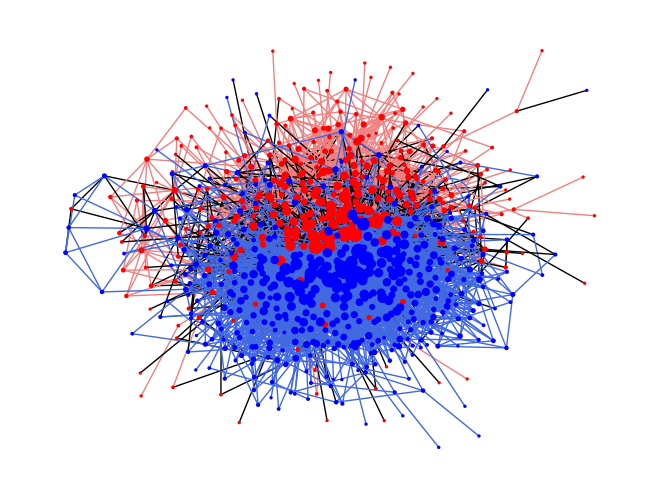

In [8]:
nx.draw_kamada_kawai(un_di_G, node_size=node_sizes, node_color=colors, edge_color=edge_colors, with_labels=False)

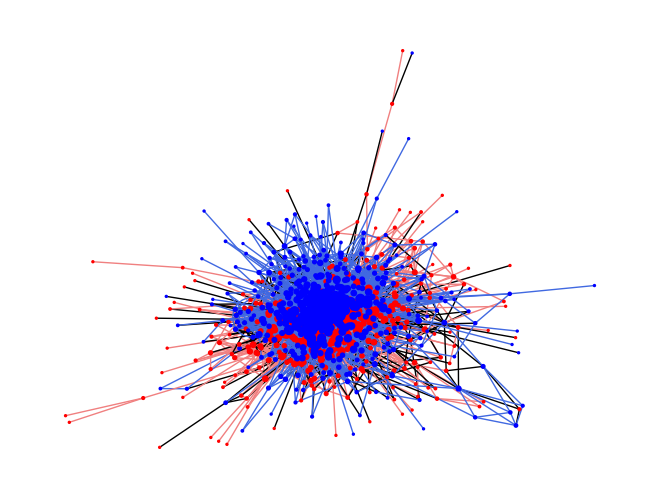

In [9]:
nx.draw(un_di_G, node_size=node_sizes, node_color=colors, edge_color=edge_colors, with_labels=False)

*Exercise 3:* From the previous plot it is more difficult to observe any specific structure in the network. We can make even better visualisations with `ForceAtlas2` package:
>1. [Force Atlas 2 algorithm](https://github.com/bhargavchippada/forceatlas2) helps to determine the positions of the nodes (see what the result looks like below).
>2.You can install the  package typing `pip install fa2` in the terminal. The [github page](https://github.com/bhargavchippada/forceatlas2) explains how to use the package to get coordinates for each node.
>   * (**Hint**: if you install force atlas and Python can't find the package it might be because you computer tries to use the system's `pip`, therefore, try installing using the Anaconda pip explicitly ( on mac you would use `~/anaconda2/bin/pip install fa2`).
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and node-coordinates from the force atlas algorithm. As in the previous Exercise:
>   * Node color should depend on the `coast` attribute (i.e. use different colors for west-coast and east-coast rappers)
>   * Node size should depend on the node *degree*
>   * **Optional**: edge color should depend on the `coast` attribute. If an edge connects west-coast rappers, assign `color_a`, if the edge connects east-coast rappers from  assign `color_b`, in other cases assign `color_c` (i.e. when connected rappers are from different coasts).
> * Play with the force atlas algorithm parameters to obtain a visualization you like. It may look similar to the one below (but not necessarily). 
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?





![](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Visualfa2Rappers.pngraw=true)

*Exercise 4*: We continue with a qualitative inspection of the rapper Wiki pages, that will help us to intepret our results. We investigate the reasons for links between rappers to exist on rapper Wiki.

>1. Consider the top 3 nodes with highest in-degree in the network. Open the corresponding Wiki pages.
>   * Consider the set of neighbours pointing towards the node found above. Look for them in the page. 
>   * What is the relation between the rappers you identified and his/her network neighbours? (e.g., do they come from the same coast, did they write songs together, etc.). You don't need to come up with a grand theory of rap music here, I just want you to think about how links come about.
>   * Repeat the exercise for the top 3 out-degree node. 
>   * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur between rappers.

In [10]:
# find the top 10 most connected nodes
top3_in = sorted(G_giant.in_degree, key=lambda x: x[1], reverse=True)[:3]
print(top3_in)
# print neighbors of each of the top 3 most connected nodes
for node in top3_in:
    neighbors = G_giant.neighbors(node[0])
    print(node[0], list(neighbors))

top3_out = sorted(G_giant.out_degree, key=lambda x: x[1], reverse=True)[:3]
print(top3_out)
# print neighbors of each of the top 3 most connected nodes
for node in top3_out:
    neighbors = G_giant.neighbors(node[0])
    print(node[0], list(neighbors))

[('Snoop Dogg', 127), ('Jay-Z', 114), ('Nas', 98)]
Snoop Dogg ['Daz Dillinger', 'Nate Dogg', 'RBX', 'Dr. Dre', 'Warren G', 'The D.O.C.', 'Kurupt', 'Tupac Shakur', 'Xzibit', 'Coolio', 'E-40', 'Benzino', 'DJ Drama', 'Too Short', 'Lil Dicky', 'Kendrick Lamar', 'Benny the Butcher', 'Kool Moe Dee', 'Ice Cube', 'The Notorious B.I.G.', 'Jay-Z', 'The Game (rapper)']
Jay-Z ['The Notorious B.I.G.', 'Jaz-O', 'Big Daddy Kane', 'Big L', 'Mic Geronimo', 'Ja Rule', 'DMX', 'DJ Premier', 'Sean Combs', 'Swizz Beatz', 'Erick Sermon', 'Kid Capri', 'Just Blaze', 'Prodigy (rapper)', 'Tupac Shakur', 'Snoop Dogg', 'Nas', 'DJ Quik', 'Memphis Bleek', 'Ghostface Killah', 'Foxy Brown (rapper)', 'Mike Shinoda', 'Dr. Dre', 'Funkmaster Flex', 'Jahlil Beats', 'Pusha T', 'Guerilla Black', 'Shock G', '50 Cent', 'Meek Mill']
Nas ['Large Professor', 'Jay-Z', 'Hit-Boy', 'Rakim', 'Kool G Rap', 'Pete Rock', 'Q-Tip (musician)', 'DJ Premier', 'AZ (rapper)', 'The Notorious B.I.G.', 'Foxy Brown (rapper)', 'Dr. Dre', 'B-Real', '

>2. Are there any nodes with high out-degree and with few incoming connections? If yes, open the Wiki pages of such rappers and explain what happens?
>3. Are there any nodes with high in-degree and few outcoming connections? Again, open the Wiki pages of such rappers and explain what happens? 
>4. Do any nodes have particularly many links to rappers from the opposite coast? If yes, try and find out what is going on.

In [11]:
k_in = np.array([d for n, d in G_giant.in_degree()])
k_out = np.array([d for n, d in G_giant.out_degree()])

k_diff_in = k_in-k_out

top3_diff_in = sorted(zip(G_giant.nodes(), k_diff_in), key=lambda x: x[1], reverse=True)[:3]
print(top3_diff_in)

k_diff_out = k_out-k_in

top3_diff_out = sorted(zip(G_giant.nodes(), k_diff_out), key=lambda x: x[1], reverse=True)[:3]
print(top3_diff_out)

[('Snoop Dogg', 105), ('Jay-Z', 84), ('Nas', 65)]
[('Drag-On', 46), ('DJ Dahi', 34), ('Ty Fyffe', 28)]


In [12]:
# count number of links to nodes in opposite coast for each node
cross_coast_links = []
for node in G_giant.nodes():
    cross_coast_links.append(sum([1 for neighbor in G_giant.neighbors(node) if G_giant.nodes[neighbor]['coast'] != G_giant.nodes[node]['coast']]))
print(cross_coast_links)
top_3_coast_links = sorted(zip(G_giant.nodes(), cross_coast_links), key=lambda x: x[1], reverse=True)[:3]
print(top_3_coast_links)

[0, 3, 1, 0, 6, 0, 1, 1, 0, 0, 19, 0, 0, 1, 3, 0, 0, 0, 3, 2, 2, 0, 0, 3, 0, 3, 0, 2, 5, 0, 1, 2, 2, 5, 1, 1, 1, 5, 3, 0, 5, 2, 0, 3, 1, 0, 0, 1, 2, 3, 6, 2, 7, 0, 3, 2, 0, 10, 1, 0, 1, 2, 3, 5, 1, 3, 7, 2, 2, 15, 1, 0, 1, 0, 1, 4, 1, 1, 3, 6, 6, 2, 1, 2, 0, 3, 0, 0, 0, 4, 0, 1, 0, 0, 2, 2, 0, 0, 20, 1, 4, 4, 0, 2, 0, 1, 12, 0, 0, 2, 1, 0, 1, 1, 6, 1, 1, 2, 1, 7, 1, 0, 6, 0, 3, 2, 0, 0, 4, 0, 0, 0, 0, 7, 0, 1, 5, 2, 7, 0, 0, 0, 1, 2, 1, 0, 0, 9, 2, 1, 1, 1, 14, 1, 20, 5, 3, 8, 2, 1, 1, 0, 0, 0, 1, 2, 0, 5, 2, 0, 0, 1, 0, 6, 7, 2, 1, 2, 0, 2, 5, 0, 1, 4, 0, 2, 0, 0, 4, 1, 7, 2, 5, 1, 0, 0, 1, 3, 1, 0, 3, 0, 0, 0, 0, 8, 0, 1, 1, 4, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 7, 4, 9, 0, 1, 0, 11, 3, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 2, 13, 0, 3, 4, 5, 0, 0, 1, 0, 0, 0, 3, 3, 2, 2, 0, 0, 2, 1, 0, 0, 0, 2, 4, 1, 1, 0, 0, 6, 4, 0, 1, 0, 0, 0, 4, 1, 4, 0, 1, 1, 0, 2, 1, 0, 3, 1, 0, 1, 1, 1, 9, 7, 0, 1, 0, 3, 0, 1, 0, 3, 1, 6, 1, 6, 0, 3, 3, 0, 0, 2, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

# Part B:  Advanced tools 

> **Video lecture**: [*Network measures*.](https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0) Link: https://www.dropbox.com/scl/fi/8dal16z6z2b7lqhwq2f1j/NetworkMeasures.mp4?rlkey=c0imv3tewun2ivoxgtqrrov31&dl=0

*Exercise 1:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

>1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
>    * On top of that, calculate same statistics separately for the network that is spanned only by east-coast rappers and only by west-coast rappers. How do you interpret the results? 

In [13]:
#make graph with only west coast rappers from G_giant
G_west = nx.DiGraph()
for node in G_giant.nodes():
    if G_giant.nodes[node]['coast'] == 'West':
        G_west.add_node(node, coast='West', content_lenght=G_giant.nodes[node]['content_lenght'])

for edge in G_giant.edges():
    if G_giant.nodes[edge[0]]['coast'] == 'West' and G_giant.nodes[edge[1]]['coast'] == 'West':
        G_west.add_edge(edge[0], edge[1])

print(len(G_west.nodes()))
print(len(G_west.edges()))

#make graph with only east coast rappers from G_giant
G_east = nx.DiGraph()
for node in G_giant.nodes():
    if G_giant.nodes[node]['coast'] == 'East':
        G_east.add_node(node, coast='East', content_lenght=G_giant.nodes[node]['content_lenght'])

for edge in G_giant.edges():
    if G_giant.nodes[edge[0]]['coast'] == 'East' and G_giant.nodes[edge[1]]['coast'] == 'East':
        G_east.add_edge(edge[0], edge[1])

print(len(G_east.nodes()))
print(len(G_east.edges()))

309
1608
419
2941


In [44]:
nx.write_gexf(G_west, "rappers_west.gexf")
nx.write_gexf(G_east, "rappers_east.gexf")

In [14]:
k_in = np.array([d for n, d in G_giant.in_degree()])
k_out = np.array([d for n, d in G_giant.out_degree()])
k = k_in + k_out
k_in_west = np.array([d for n, d in G_west.in_degree()])
k_out_west = np.array([d for n, d in G_west.out_degree()])
k_west = k_in_west + k_out_west
k_in_east = np.array([d for n, d in G_east.in_degree()])
k_out_east = np.array([d for n, d in G_east.out_degree()])
k_east = k_in_east + k_out_east

print(f'mean degree: {np.mean(k)}')
print(f'median degree: {np.median(k)}')
print(f'min degree: {np.min(k)}')
print(f'max degree: {np.max(k)}')

print(f'mean in degree: {np.mean(k_in)}')
print(f'median in degree: {np.median(k_in)}')
print(f'min in degree: {np.min(k_in)}')
print(f'max in degree: {np.max(k_in)}')

print(f'mean out degree: {np.mean(k_out)}')
print(f'median out degree: {np.median(k_out)}')
print(f'min out degree: {np.min(k_out)}')
print(f'max out degree: {np.max(k_out)}')   

print(f'mean degree west: {np.mean(k_west)}')
print(f'median degree west: {np.median(k_west)}')
print(f'min degree west: {np.min(k_west)}')
print(f'max degree west: {np.max(k_west)}')

print(f'mean in degree west: {np.mean(k_in_west)}')
print(f'median in degree west: {np.median(k_in_west)}')
print(f'min in degree west: {np.min(k_in_west)}')
print(f'max in degree west: {np.max(k_in_west)}')

print(f'mean out degree west: {np.mean(k_out_west)}')
print(f'median out degree west: {np.median(k_out_west)}')
print(f'min out degree west: {np.min(k_out_west)}')
print(f'max out degree west: {np.max(k_out_west)}')

print(f'mean degree east: {np.mean(k_east)}')
print(f'median degree east: {np.median(k_east)}')
print(f'min degree east: {np.min(k_east)}')
print(f'max degree east: {np.max(k_east)}')

print(f'mean in degree east: {np.mean(k_in_east)}')
print(f'median in degree east: {np.median(k_in_east)}')
print(f'min in degree east: {np.min(k_in_east)}')
print(f'max in degree east: {np.max(k_in_east)}')

print(f'mean out degree east: {np.mean(k_out_east)}')
print(f'median out degree east: {np.median(k_out_east)}')
print(f'min out degree east: {np.min(k_out_east)}')
print(f'max out degree east: {np.max(k_out_east)}')


mean degree: 15.958791208791208
median degree: 9.0
min degree: 1
max degree: 149
mean in degree: 7.979395604395604
median in degree: 3.0
min in degree: 0
max in degree: 127
mean out degree: 7.979395604395604
median out degree: 6.0
min out degree: 0
max out degree: 52
mean degree west: 10.407766990291263
median degree west: 6.0
min degree west: 0
max degree west: 100
mean in degree west: 5.203883495145631
median in degree west: 2.0
min in degree west: 0
max in degree west: 85
mean out degree west: 5.203883495145631
median out degree west: 4.0
min out degree west: 0
max out degree west: 28
mean degree east: 14.0381861575179
median degree east: 8.0
min degree east: 0
max degree east: 117
mean in degree east: 7.01909307875895
median in degree east: 3.0
min in degree east: 0
max in degree east: 93
mean out degree east: 7.01909307875895
median out degree east: 5.0
min out degree east: 0
max out degree east: 47



>2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)*
>    * To calculate it, you can install `powerlaw` package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. What does it say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Some long time ago, couple of scientist have analyzed the network that is spanned by the whole Wikipedia (paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A**? If not, why? 


In [15]:
import powerlaw
alpha = powerlaw.Fit(k).alpha
alpha_in = powerlaw.Fit(k_in).alpha
alpha_out = powerlaw.Fit(k_out).alpha


print(f'alpha: {alpha}')
print(f'alpha in: {alpha_in}')
print(f'alpha out: {alpha_out}')

alpha_west = powerlaw.Fit(k_west).alpha
alpha_in_west = powerlaw.Fit(k_in_west).alpha
alpha_out_west = powerlaw.Fit(k_out_west).alpha

print(f'alpha west: {alpha_west}')
print(f'alpha in west: {alpha_in_west}')
print(f'alpha out west: {alpha_out_west}')

alpha_east = powerlaw.Fit(k_east).alpha
alpha_in_east = powerlaw.Fit(k_in_east).alpha
alpha_out_east = powerlaw.Fit(k_out_east).alpha

print(f'alpha east: {alpha_east}')
print(f'alpha in east: {alpha_in_east}')
print(f'alpha out east: {alpha_out_east}')

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha: 3.5311583019520425
alpha in: 2.728424664021232
alpha out: 12.24236893689206
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha west: 4.049636790053613
alpha in west: 2.8678248209863533
alpha out west: 3.1345749417351136
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
alpha east: 5.07315175873074
alpha in east: 3.0048916096166716
alpha out east: 9.164966396824607


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


>3. Plot a scatter plot of the the in- versus out- degree for all rappers. Comment on the relation between the two.


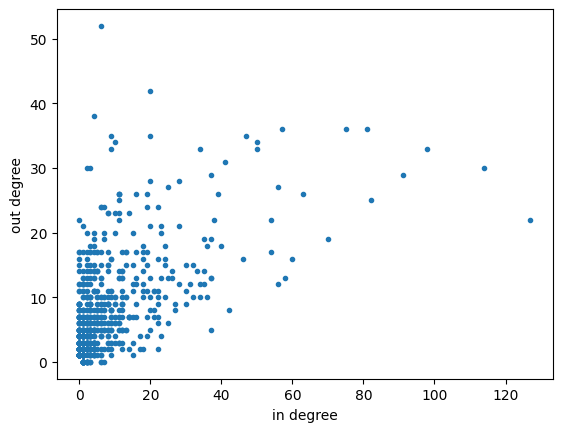

In [16]:
import matplotlib.pyplot as plt

plt.plot(k_in, k_out, '.')
plt.xlabel('in degree')
plt.ylabel('out degree')
plt.show()

>4. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all rappers. What is the advantage of using a heatmap over the scatter plot?


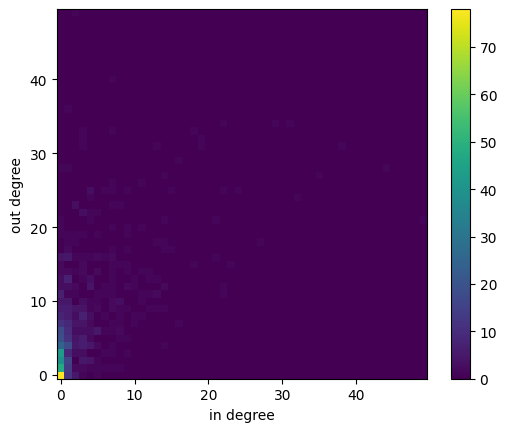

In [17]:
heatmap, xedges, yedges = np.histogram2d(k_in, k_out, bins=50)
#extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, origin='lower')#, extent=extent, origin='lower')
plt.xlabel('in degree')
plt.ylabel('out degree')
plt.colorbar()
plt.show()

>5. Why have we used directed graphs throughout this exercise? Could we have used an undirected graph instead?


> Well we could not have compared the in and out degree?

>6. We have one more metric that we did not use. The node-attribute `content lenght`. There are two things we can investigate here.
>   * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree.
>   * Secondly, and more interestingly, it could be that famous rappers have longer texts. And that means more in-links. 
>   * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using spearman or pearson, fit a curve to the data, you decide). Once you've tested, let me know. Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

correlation coefficient: 0.4302917421362447
correlation coefficient: 0.3747458295718291
slope: 233.21408827712986
intercept: 1601.7669796677924
r_value: 0.374745829571829


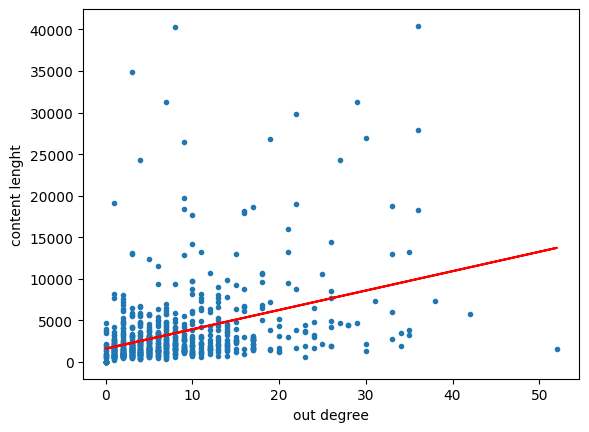

In [18]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import linregress
# check correlation between out degree and content length
content_lenght = np.array([d for n, d in G_giant.nodes(data='content_lenght')])

# calculate spearman correlation coefficient
corr, p = spearmanr(k_out, content_lenght)
print(f'correlation coefficient: {corr}')

# calculate pearson correlation coefficient
corr, p = pearsonr(k_out, content_lenght)
print(f'correlation coefficient: {corr}')

# fit line to data
slope, intercept, r_value, p_value, std_err = linregress(k_out, content_lenght)
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')

plt.plot(k_out, content_lenght, '.')
plt.plot(k_out, intercept + slope*k_out, 'r', label='fitted line')
plt.xlabel('out degree')
plt.ylabel('content lenght')
plt.show()


correlation coefficient: 0.42741050840053063
correlation coefficient: 0.46082549364352365
slope: 0.49983394566986183
intercept: 6.819293132088119
r_value: 0.4608254936435238


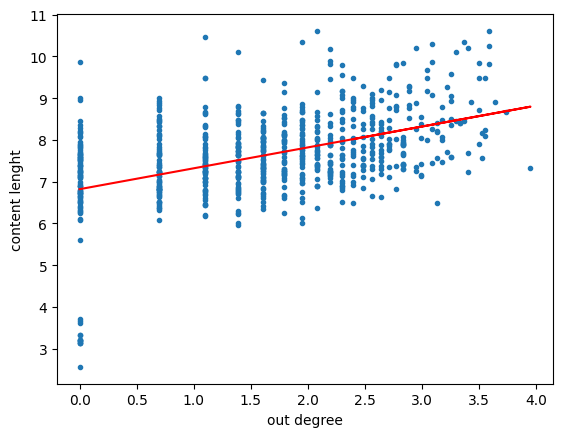

In [19]:
# check correlation between out degree and content length
log_content_lenght = np.log(content_lenght)
k_in2 = k_in.copy()
k_in2[k_in2 == 0] = 1
k_out2 = k_out.copy()
k_out2[k_out2 == 0] = 1

# calculate spearman correlation coefficient
corr, p = spearmanr(np.log(k_out2), log_content_lenght)
print(f'correlation coefficient: {corr}')

# calculate pearson correlation coefficient
corr, p = pearsonr(np.log(k_out2), log_content_lenght)
print(f'correlation coefficient: {corr}')

# fit line to data
slope, intercept, r_value, p_value, std_err = linregress(np.log(k_out2), log_content_lenght)
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')

plt.plot(np.log(k_out2), log_content_lenght, '.')
plt.plot(np.log(k_out2), intercept + slope*np.log(k_out2), 'r', label='fitted line')
plt.xlabel('out degree')
plt.ylabel('content lenght')
plt.show()


correlation coefficient: 0.4639878244347837
correlation coefficient: 0.5967255393874498
slope: 204.48647334590856
intercept: 1830.9959839747492
r_value: 0.5967255393874497


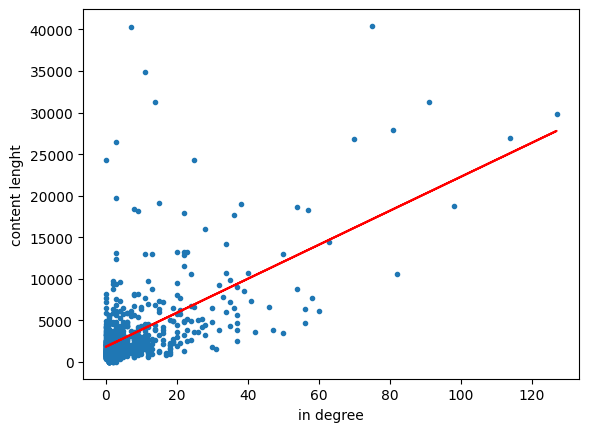

In [20]:
# check correlation between in degree and content length
content_lenght = np.array([d for n, d in G_giant.nodes(data='content_lenght')])

# calculate spearman correlation coefficient
from scipy.stats import spearmanr
corr, p = spearmanr(k_in, content_lenght)
print(f'correlation coefficient: {corr}')

# calculate pearson correlation coefficient
from scipy.stats import pearsonr
corr, p = pearsonr(k_in, content_lenght)
print(f'correlation coefficient: {corr}')

# fit line to data
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(k_in, content_lenght)
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')


plt.plot(k_in, content_lenght, '.')
plt.plot(k_in, intercept + slope*k_in, 'r', label='fitted line')
plt.xlabel('in degree')
plt.ylabel('content lenght')
plt.show()


correlation coefficient: 0.47597228052969903
correlation coefficient: 0.4890518379657543
slope: 0.41852364493166666
intercept: 7.113988305506937
r_value: 0.48905183796575413


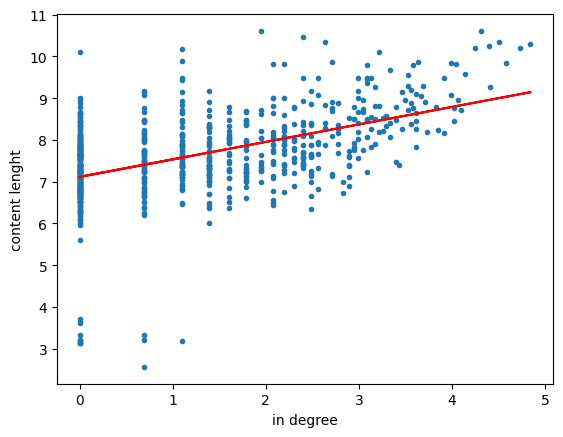

In [21]:

# calculate spearman correlation coefficient
corr, p = spearmanr(np.log(k_in2), log_content_lenght)
print(f'correlation coefficient: {corr}')

# calculate pearson correlation coefficient
corr, p = pearsonr(np.log(k_in2), log_content_lenght)
print(f'correlation coefficient: {corr}')

# fit line to data
slope, intercept, r_value, p_value, std_err = linregress(np.log(k_in2), log_content_lenght)
print(f'slope: {slope}')
print(f'intercept: {intercept}')
print(f'r_value: {r_value}')

plt.plot(np.log(k_in2), log_content_lenght, '.')
plt.plot(np.log(k_in2), intercept + slope*np.log(k_in2), 'r', label='fitted line')
plt.xlabel('in degree')
plt.ylabel('content lenght')
plt.show()


*Exercise 2:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise.
>1. Find the 5 most central rappers according to [degree centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html). 



In [22]:
centrality = nx.degree_centrality(G_giant)

>2. Find the 5 most central rappers according to [betweenness centrality](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_betweenness_centrality.html?highlight=betweenness%20centrality). 


In [23]:
betweenness = nx.betweenness_centrality(G_giant)

>3. Find the 5 most central rappers according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see [NetworkX documentation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality) for details). 


In [24]:
eigenvector = nx.eigenvector_centrality(G_giant)

>   * Repeat Exercise A2 or A3 (depending on which visualization method you liked the most). However, this time use the different centrality to define the size of the node.
>   * What role do you imagine rappers with high the different centrality play on  Wikipedia? 


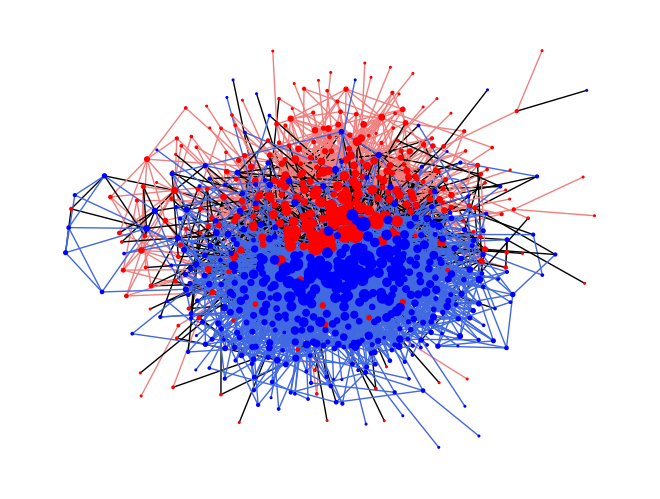

In [25]:
un_di_G = G_giant.to_undirected()
centrality = nx.degree_centrality(un_di_G)
node_sizes = [centrality[node]*1000 for node in un_di_G]

colors = ['red' if un_di_G.nodes[node]['coast']=='West' else 'blue' for node in un_di_G]

edge_colors = []
for edge in un_di_G.edges():
    if un_di_G.nodes[edge[0]]['coast']=='West' and un_di_G.nodes[edge[1]]['coast']=='West':
        edge_colors.append('lightcoral')
    elif un_di_G.nodes[edge[0]]['coast']=='East' and un_di_G.nodes[edge[1]]['coast']=='East':
        edge_colors.append('royalblue')
    else:
        edge_colors.append('black')
        
nx.draw_kamada_kawai(un_di_G, node_size=node_sizes, node_color=colors, edge_color=edge_colors, with_labels=False)

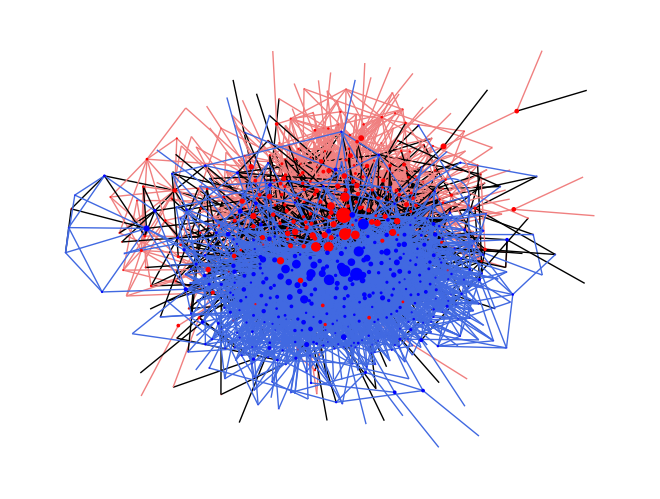

In [26]:
un_di_G = G_giant.to_undirected()
betweenness = nx.betweenness_centrality(un_di_G)
node_sizes = [betweenness[node]*1000 for node in un_di_G]

colors = ['red' if un_di_G.nodes[node]['coast']=='West' else 'blue' for node in un_di_G]

edge_colors = []
for edge in un_di_G.edges():
    if un_di_G.nodes[edge[0]]['coast']=='West' and un_di_G.nodes[edge[1]]['coast']=='West':
        edge_colors.append('lightcoral')
    elif un_di_G.nodes[edge[0]]['coast']=='East' and un_di_G.nodes[edge[1]]['coast']=='East':
        edge_colors.append('royalblue')
    else:
        edge_colors.append('black')
        
nx.draw_kamada_kawai(un_di_G, node_size=node_sizes, node_color=colors, edge_color=edge_colors, with_labels=False)

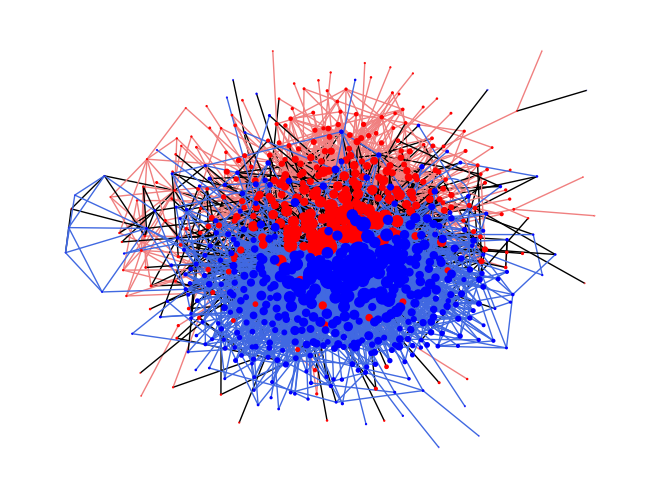

In [27]:
un_di_G = G_giant.to_undirected()
eigenvector = nx.eigenvector_centrality(un_di_G)
node_sizes = [eigenvector[node]*1000 for node in un_di_G]

colors = ['red' if un_di_G.nodes[node]['coast']=='West' else 'blue' for node in un_di_G]

edge_colors = []
for edge in un_di_G.edges():
    if un_di_G.nodes[edge[0]]['coast']=='West' and un_di_G.nodes[edge[1]]['coast']=='West':
        edge_colors.append('lightcoral')
    elif un_di_G.nodes[edge[0]]['coast']=='East' and un_di_G.nodes[edge[1]]['coast']=='East':
        edge_colors.append('royalblue')
    else:
        edge_colors.append('black')
        
nx.draw_kamada_kawai(un_di_G, node_size=node_sizes, node_color=colors, edge_color=edge_colors, with_labels=False)

>4. Is the undirected version of the graph assortative with respect to degree? (e.g. do high-degree rappers tend to link to other high-degree rappers, and low-degree rappers to other low-degree rappers?). Provide an interpretation of your answer.


In [28]:
r_degree = nx.degree_assortativity_coefficient(un_di_G)
print(f'assortativity coefficient: {r_degree}')

assortativity coefficient: -0.034225368240344785


>5. Is the undirected version of the graph assortative with respect do the `content length` nodal properties? (e.g. do rappers with long Wikipedia pages tend to link to other rappers with long Wiki pages, and *vice versa*?. Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.


In [29]:
r_content_lenght = nx.attribute_assortativity_coefficient(un_di_G, 'content_lenght')
print(f'assortativity coefficient: {r_content_lenght}')

assortativity coefficient: -0.003162717311182713


>6. Is the undirected version of the graph assortative with respect to Coast? (e.g. west-coast rappers tending to link to west-coast rappers, etc.). Provide an interpretation of your answer.


In [31]:
r_coast = nx.attribute_assortativity_coefficient(un_di_G, 'coast')
print(f'assortativity coefficient: {r_coast}')

assortativity coefficient: 0.5264919787949136


>7. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?


In [36]:
# average shortest path length
avg_d = nx.average_shortest_path_length(un_di_G)
print(f'average shortest path length: {avg_d}')

G_ER = nx.erdos_renyi_graph(len(un_di_G.nodes()), nx.density(un_di_G))
avg_d_ER = nx.average_shortest_path_length(G_ER)
print(f'average shortest path length: {avg_d_ER}')

average shortest path length: 2.993303807609172
average shortest path length: 2.790898922260683


>   * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

In [38]:
# plot distribution over shortest path lengths
d = []
for node in un_di_G.nodes():
    for node2 in un_di_G.nodes():
        if node != node2:
            d.append(nx.shortest_path_length(un_di_G, node, node2))


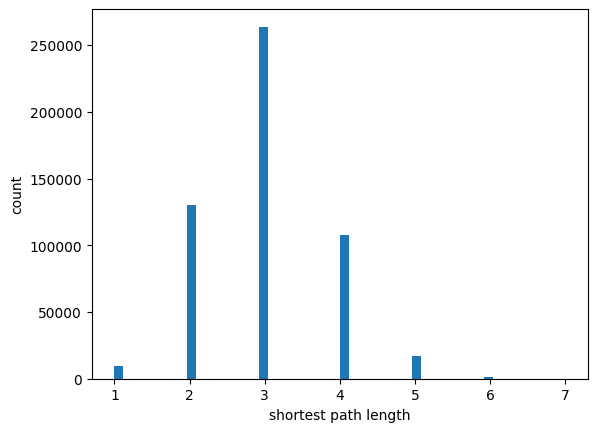

In [39]:
plt.hist(d, bins=50)
plt.xlabel('shortest path length')
plt.ylabel('count')
plt.show()

In [40]:
# plot distribution over shortest path lengths
d = []
for node in G_ER.nodes():
    for node2 in G_ER.nodes():
        if node != node2:
            d.append(nx.shortest_path_length(G_ER, node, node2))


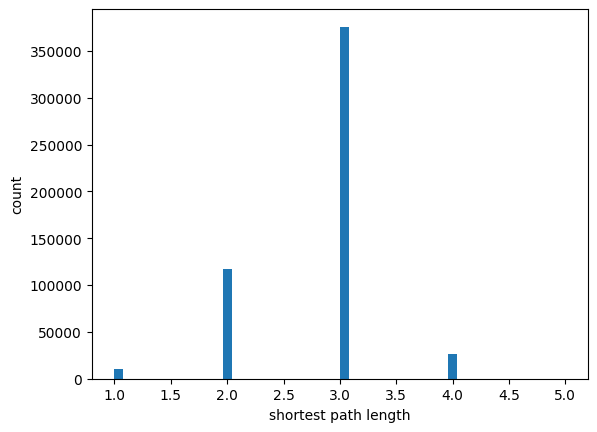

In [41]:
plt.hist(d, bins=50)
plt.xlabel('shortest path length')
plt.ylabel('count')
plt.show()

*Exercise 3*: Is the coast of a rapper important for the network structure? Let us explore if and how it shapes the network (use the undirected network). 
>1. Compute the average node centrality for west-coast and east-coast rappers respectively. You are free to choose your favourite centrality measure or compare different ones. Which coast do the more central rappers have?


In [53]:
centrality = nx.degree_centrality(un_di_G)
centrality_west = [centrality[node] for node in G_west]
centrality_east = [centrality[node] for node in G_east]
sorted_centrality_west = sorted(zip(G_west.nodes(), centrality_west), key=lambda x: x[1], reverse=True)
top10_centrality_west = sorted_centrality_west[:10]
sorted_centrality_east = sorted(zip(G_east.nodes(), centrality_east), key=lambda x: x[1], reverse=True)
top10_centrality_east = sorted_centrality_east[:10]
print(top10_centrality_west)
print(top10_centrality_east)
avg_central_west = np.mean(centrality_west)
avg_central_east = np.mean(centrality_east)
print(avg_central_west)
print(avg_central_east)


[('Snoop Dogg', 0.17744154057771663), ('Kendrick Lamar', 0.13067400275103164), ('Dr. Dre', 0.11966987620357634), ('The Game (rapper)', 0.11004126547455295), ('Tupac Shakur', 0.1031636863823934), ('E-40', 0.0921595598349381), ('Kurupt', 0.08528198074277854), ('The Alchemist (musician)', 0.06740027510316368), ('Ty Dolla Sign', 0.06602475928473178), ('Ice Cube', 0.06327372764786796)]
[('Jay-Z', 0.16368638239339753), ('Nas', 0.1485557083906465), ('50 Cent', 0.13342503438789546), ('Busta Rhymes', 0.1279229711141678), ('The Notorious B.I.G.', 0.1031636863823934), ('Jadakiss', 0.09628610729023383), ('French Montana', 0.0921595598349381), ('Wiz Khalifa', 0.0907840440165062), ('DJ Premier', 0.0907840440165062), ('Fat Joe', 0.08665749656121045)]
0.016920180018963425
0.01994990364823563


>2. Create a randomized version of the full graph, where the association between nodes and coast is shuffled. Compute the average centrality of west-coast and east-coast rappers for this randomized graph. 
>   * **Hint**: To create this shuffling, simply give everyone a random coast assignment (but with the same number of west-coast and east-coast rappers as in the real data). The way I usually create random lables is by using either [`random.shuffle`](https://docs.python.org/3/library/random.html#random.shuffle) or [`numpy.random.permutation`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.permutation.html).


>3. Repeat the shuffling process above 1000 times (at least) and plot two histograms, each histogram with the 1000 corresponding average values of centrality obtained for west-coast and east-coast rappers in the shuffeled netowrks.
>4. Compare the value you have obtained in the real graph, with the randomized cases. Are rappers from one coast more central in the network (on average)?
>5. Think about your results, what could be possible explanations for what you observe?

The shuffling procedure you just carried out is often called a _permutation test_. It is a super powerful tool that we use all the time. Once you start to think about it, you can answer many questions of the type "Is [property] higher/lower in this network than one might have expected by chance?" with permutation tests.